# Question 1

Given the first order equation
\begin{equation} 
y^{'} = (1-2t)y^2,
\end{equation}
with the initial condition
\begin{equation} 
y(1) = \alpha.
\end{equation}
Exact soultion
\begin{equation} 
y(t) = \frac{1}{t^2-t+\frac{1}{\alpha}}.
\end{equation}


Aproximate the solution of the inital value problem for the interval $1 \leq t \leq 2$ using $N=5$, with a stepsize $h=0.2$ and
$$f(t,y)=(1-2t)y^2. $$
Using the:

### a. Euler method:
The general Euler method is,
$$ w_{i+1}=w_i+hf(t_i,w_i);$$
with the local truncation error
$$ \tau=\frac{hM_2}{2}, $$
where $$M_2=\max_{1\leq t \leq 2}|y''(t)|$$
and the global error
$$|w_i-y(t_i)|\leq \frac{hM_2}{2} \frac{e^{L(1)}-1}{L}, $$
 and $L$ is the Lipschitz constant.

### b. 2nd Order Taylor:
The general 2nd order Taylor is,
$$ w_{i+1}=w_i+h(f(t_i,w_i)+\frac{h}{2}f'(t_i,w_i),$$
with the local truncation error
$$ \tau=\frac{h^2M_3}{6} $$
where $$M_3=\max_{1\leq t \leq 2}|y'''(t)|$$
and the global error
$$|w_i-y(t_i)|\leq \frac{h^2M_3}{6} \frac{e^{L(1)}-1}{L}, $$
 and $L$ is the Lipschitz constant.


### c. 4th Order Runge Kutta method:
The general 4th order Runge Kutta is,
$$ w_{i+1}=w_i+\frac{h}{6}(k1+2k2+2k3+k4),$$
where $$k1=f(t_i,w_i),$$
$$k2=f(t_i+\frac{h}{2},w_i+\frac{h}{2}k1),$$
$$k3=f(t_i+\frac{h}{2},w_i+\frac{h}{2}k2),$$
$$k4=f(t_i+h,w_i+hk3);$$
with the local truncation error
$$ \tau=\frac{h^4M_5}{120} $$
where $$M_5=\max_{1\leq t \leq 2}|y^{(5)}(t)|$$
and the global error
$$|w_i-y(t_i)|\leq \frac{h^4M_5}{120} \frac{e^{L(1)}-1}{L}, $$
and $L$ is the Lipschitz constant.


### d. 2 step Adams Bashforth:
The general 2 step Adams Bashforth is,
$$ w_{i+1}=w_i+\frac{h}{2}[3f(t_i,w_i)-f(t_{i-1},w_{i-1})],$$
with the local truncation error
$$ \tau=\frac{5h^2M_3}{12} $$
where $$M_3=\max_{1\leq t \leq 2}|y'''(t)|$$
and the global error
$$|w_i-y(t_i)|\leq \frac{h^2M_3}{6} \frac{e^{L(1)}-1}{L}, $$
 and $L$ is the Lipschitz constant.


### e. Predictor Corrector:
The predictor is the 2 step Adams Bashforth
$$ w^0_{i+1}=w_i+\frac{h}{2}[3f(t_i,w_i)-f(t_{i-1},w_{i-1})],$$
and the corrector is the 2 step Adams Moulton
$$ w_{i+1}=w_i+\frac{h}{2}[5f(t_{i+1},w^0_{i+1})+8f(t_i,w_i)-f(t_{i-1},w_{i-1})].$$



In [1]:
## Declaring libraries
import numpy as np
import math 

%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore")
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
## To output results as a nice table
class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)

## Setting up the discrete time axis
$$ h=\frac{t_{end}-t_{start}}{N}, $$
$$ h=\frac{2-1}{4}=0.25, $$
$$t_i=t_0+ih,$$
$$t_i=0+0.25i,$$
for $i=0,1,2,3,4.$

In [3]:
N=4
t_end=2.0
t_start=1.0
h=((t_end-t_start)/N)

INITIALCONDITION=4
time=np.arange(t_start,t_end+h/2,h)
#time[0]=1

## a. Euler method:
The Euler method for the IVP is
$$ w_{i+1}=w_i+0.25[(1-2t_i)w_i^2];$$
with
$w_0=IC.$

In [4]:
# function of f
def myfun(t,w):
    ftw=(1-2*t)*w*w
    return ftw

In [5]:
Euler=np.zeros(N+1)
Euler[0]=INITIALCONDITION

table = ListTable()
table.append(['i','time', 'Euler'])


for i in range (0,N):
    # Euler Method
    Euler[i+1]=Euler[i]+h*myfun(time[i],Euler[i])
    table.append([i,round(time[i],3), round(Euler[i],6)])

i=i+1
table.append([i,round(time[i],3), round(Euler[i],3)])

print('The table below shows the results of the Euler method:')
table
    

The table below shows the results of the Euler method:


i,time,Euler
0,1.0,4.0
1,1.25,0.0
2,1.5,0.0
3,1.75,0.0
4,2.0,0.0


## Euler Error
### Local Truncation Error
The local truncation error for the Euler method for the IVP is
$$ \tau=\frac{0.2 M_2}{2}, $$
where $$M_2=\max_{1\leq t \leq 2}\left|\frac{2(2t-1)}{(t^2-t+\frac{1}{IC})}-\left(\frac{2}{(t^2-t+\frac{1}{IC})}\right)^2\right|$$


In [6]:
## The second derivative of y
def myfun_exactdd(t):
    ftw=2*(2*t-1)**2/(t*t-t+1/INITIALCONDITION)**3-2/(t*t-t+1/INITIALCONDITION)**2

    return ftw

In [7]:
Euler_LTE=max(abs(myfun_exactdd(time)))*h/2
print('Euler Local Truncation error:',Euler_LTE)

Euler Local Truncation error: 12.0


### Global Truncation Error
The global error for the Euler is 
$$|w_i-y(t_i)|\leq \frac{hM_2}{2} \frac{e^{L(1)}-1}{L}, $$
 and $L$ is the Lipschitz constant.
 For simplicity we will set $L=1$.

In [8]:
Euler_Global=max(abs(myfun_exactdd(time)))*h/2*(np.exp(1)-1)
print('Euler Global error:',Euler_Global)

Euler Global error: 20.619381941508543


## b. 2nd Order Taylor:
The 2nd Order Taylor for the IVP is
$$ w_{i+1}=w_i+0.25\left[[(1-2t_i)w_i^2]+\frac{0.25}{2}[-2w_i^2+2w_i(1-2t_i)((1-2t_i)w_i^2)]\right].$$


In [9]:
## The first derivative of f with respect to t
def myfund(t,w):
    ftw=(-2)*w*w+(1-2*t)*2*w*myfun(t,w)
    return ftw

In [10]:
Taylor=np.zeros(N+1)
Taylor[0]=INITIALCONDITION
table = ListTable()
table.append(['i','time', 'Taylor'])

for i in range (0,N):
    Taylor[i+1]=Taylor[i]+h*(myfun(time[i],Taylor[i])+h/2*myfund(time[i],Taylor[i]))
    table.append([i,round(time[i],3), round(Taylor[i],3)])

i=i+1
table.append([i,round(time[i],3), round(Taylor[i],3)])
print('The table below shows the results of the 2nd Order Taylor method:')
table



The table below shows the results of the 2nd Order Taylor method:


i,time,Taylor
0,1.0,4.0
1,1.25,3.0
2,1.5,2.859
3,1.75,4.105
4,2.0,19.54


## 2nd Order Taylor Error
The local truncation error for the 2nd order Taylor for the IVP is
$$ \tau=\frac{h^2M_3}{6} $$
where $$M_3=\max_{1\leq t \leq 2}\left|\frac{-6(2t-1)^3}{(t^2-t+\frac{1}{IC})^4}+12\left(\frac{2t-1}{(t^2-t+\frac{1}{IC})^3}\right)\right|.$$


In [11]:
## The third derivative of y
def myfun_exactddd(t):
    ftw=-6*(2*t-1)**3/(t*t-t+1/INITIALCONDITION)**4+12*(2*t-1)/(t*t-t+1/INITIALCONDITION)**3

    return ftw

In [12]:
Taylor_LTE=max(abs(myfun_exactddd(time)))*h**2/6

print('2nd order Taylor Local Truncation Error:',Taylor_LTE)

2nd order Taylor Local Truncation Error: 8.0


### Global Truncation Error
The global truncation error of the 2nd order Taylor for the IVP is,
$$|w_i-y(t_i)|\leq \frac{h^2M_3}{6} \frac{e^{L(1)}-1}{L}, $$
 and $L$ is the Lipschitz constant.

In [13]:
Taylor_Global=Taylor_LTE*(np.exp(1)-1)
print('2nd ordewr Taylor Global error:',Taylor_Global)

2nd ordewr Taylor Global error: 13.74625462767236


## c. 4th order Runge Kutta 
The 4th order Runge Kutta for the IVP is
$$ w_{i+1}=w_i+\frac{0.25}{6}(k1+2k2+2k3+k4),$$
where $$k1=(1-2t_i)w_i^2,$$
$$k2=f(t_i+\frac{h}{2},w_i+\frac{h}{2}k1)=(1-2(t_i+\frac{h}{2})(w_i+\frac{h}{2}k_1)^2,$$
$$k3=f(t_i+\frac{h}{2},w_i+\frac{h}{2}k2)=(1-2(t_i+\frac{h}{2})(w_i+\frac{h}{2}k_2)^2,$$
$$k4=f(t_i+h,w_i+hk3)=(1-2(t_i+h)(w_i+hk_3)^2.$$


In [14]:
RK4=np.zeros(N+1)
RK4[0]=INITIALCONDITION
table = ListTable()
table.append(['i','time', 'K1','K2',  'K3','K4','RK'])
    
for i in range (0,N):
    # 4th Order Runge Kutta
    k1=myfun(time[i],RK4[i])
    k2=myfun(time[i]+h/2,RK4[i]+h/2*k1)
    k3=myfun(time[i]+h/2,RK4[i]+h/2*k2)
    k4=myfun(time[i]+h,RK4[i]+h*k3)
    RK4[i+1]=RK4[i]+h/6*(k1+2*k2+2*k3+k4)
    table.append([i,round(time[i],3), round(k1,3), round(k2,3), round(k3,3),round(k4,3),round(RK4[i],3)])

i=i+1
table.append([i,round(time[i],3), round(k1,3), round(k2,3), round(k3,3),round(k4,3),round(RK4[i],3)])


print('The table below shows the results of the 4th Runge Kutta method:')
table


The table below shows the results of the 4th Runge Kutta method:


i,time,K1,K2,K3,K4,RK
0,1.0,-16.0,-5.0,-14.238,-0.291,4.0
1,1.25,-4.427,-2.373,-3.535,-1.392,1.718
2,1.5,-1.933,-1.237,-1.544,-0.891,0.983
3,1.75,-1.004,-0.71,-0.817,-0.554,0.634
4,2.0,-1.004,-0.71,-0.817,-0.554,0.442


## Error Runge Kutta
### Local Truncation Error
The local truncation error of the 4th order Runge Kutta for the IVP is,
$$ \tau=\frac{h^4M_5}{120} $$
where $$M_5=\max_{1\leq t \leq 2}\left|-120\frac{-(2t-1)^5}{(t^2-t+\frac{1}{IC})^6}+480\frac{(2t-1)^3}{(t^2-t+\frac{1}{IC})^5}-360\left(\frac{2t-1}{(t^2-t+\frac{1}{IC})^4}\right)\right|.$$


In [15]:
# The fifth derivative of y with respect to t
def myfun_exactddddd(t):
    ftw=-120*(2*t-1)**5/(t*t-t+1/INITIALCONDITION)**6+480*(2*t-1)**3/(t*t-t+1/INITIALCONDITION)**5-360*(2*t-1)/(t*t-t+1/INITIALCONDITION)**4

    return ftw

In [16]:
RK4_LTE=max(abs(myfun_exactddddd(time)))*h**4/120

print('4th order Runge Kutta Local Truncation error:',RK4_LTE)

4th order Runge Kutta Local Truncation error: 3.0


### Global Truncation Error
The global truncation error of the 4th order Runge Kutta for the IVP is,
$$|w_i-y(t_i)|\leq \frac{h^4M_5}{120} \frac{e^{L(1)}-1}{L}, $$
and $L$ is the Lipschitz constant.

In [17]:
RK4_Global=RK4_LTE*(np.exp(1)-1)
print('4th order Runge Kutta Global error:',RK4_Global)

4th order Runge Kutta Global error: 5.154845485377136


## d) Adams Bashforth
The 2 step Adams Bashforth for the IVP is
$$ w_{i+1}=w_i+\frac{0.25}{2}[3((1-2t_i)w_i^2)-((1-2t_{i-1})w_{i-1}^2)],$$
with the intial condition
$$w_0=IC$$
$$w_1=y(t_1)$$

In [18]:
table = ListTable()
table.append(['i','time', 'Adams Bashforth'])
AdamsBash=np.zeros(N+1)
AdamsBash[0]=INITIALCONDITION
AdamsBash[1]=RK4[1]
i=0
table.append([i,round(time[i],3), round(AdamsBash[i],3)])

for i in range (1,N):
    AdamsBash[i+1]=AdamsBash[i]+h/2*(3*myfun(time[i],AdamsBash[i])-1*myfun(time[i-1],AdamsBash[i-1]))
    table.append([i,round(time[i],3), round(AdamsBash[i],3)])

i=i+1
table.append([i,round(time[i],3), round(AdamsBash[i],3)])
print('The table below shows the results of the 2 step Adams Bashforth method:')
table
    

The table below shows the results of the 2 step Adams Bashforth method:


i,time,Adams Bashforth
0,1.0,4.0
1,1.25,1.718
2,1.5,2.058
3,1.75,-0.565
4,2.0,0.195


## 2 Step Adams Bashforth Error

### Local Truncation Error
The local truncation error of the 2 step Adams Bashforth for the IVP is,
$$ \tau=\frac{5h^2M_3}{12}, $$
where 
$$M_3=\max_{1\leq t \leq 2}\left|\frac{-6(2t-1)^3}{(t^2-t+\frac{1}{IC})^4}+12\left(\frac{2t-1}{(t^2-t+\frac{1}{IC})^3}\right)\right|.$$

In [19]:
AdamsBash_LTE=max(abs(myfun_exactddd(time)))*h**2*5/12

print('2 step Adams Bashforth Local Truncation error:',AdamsBash_LTE)



2 step Adams Bashforth Local Truncation error: 20.0


### Global Truncation Error
The global truncation error of the 2 step Adams Bashforth for the IVP is,
$$|w_i-y(t_i)|\leq \frac{h^2M_3}{6} \frac{e^{L(1)}-1}{L}, $$
 and $L$ is the Lipschitz constant.

In [20]:
AdamsBash_Global=AdamsBash_LTE*(np.exp(1)-1)
print('2 step Adams Bashforth Global error:',AdamsBash_Global)

2 step Adams Bashforth Global error: 34.3656365691809


## e. Predictor Corrector:
The predictor is the 2 step Adams Bashforth
$$ w^0_{i+1}=w_i+\frac{0.25}{2}[3((1-2t_i)w_i^2)-((1-2t_{i-1})w_{i-1}^2)],$$
and the corrector is the 2 step Adams Moulton
$$ w_{i+1}=w_i++\frac{0.25}{12}[5((1-2t_{i+1})(w^0_{i+1})^2)+8((1-2t_i)w_i^2)-((1-2t_{i-1})w_{i-1}^2)],$$



In [21]:
Adams=np.zeros(N+1)
Pred=np.zeros(N+1)
Adams[0]=INITIALCONDITION
Adams[1]=RK4[1]
Pred[0]=INITIALCONDITION
Pred[1]=RK4[1]

table = ListTable()
table.append(['i','time', 'Adams Bashforth(Pred)','Adams Moiulton (Corrector)'])
i=0
table.append([i,round(time[i],3), round(Pred[i],3),round(Adams[i],3)])


for i in range (1,N):
    Pred[i+1]=Adams[i]+h/2*(3*myfun(time[i],Adams[i])-1*myfun(time[i-1],Adams[i-1]))
    Adams[i+1]=Adams[i]+h/12*(5*myfun(time[i+1],Pred[i+1])+8*myfun(time[i],Adams[i])-myfun(time[i-1],Adams[i-1]))
    table.append([i,round(time[i],3), round(Pred[i],6),round(Adams[i],6)])
i=i+1
table.append([i,round(time[i],3), round(Pred[i],6),round(Adams[i],6)])
print('The table below shows the results of the Predictor Corrector method:')    
table

The table below shows the results of the Predictor Corrector method:


i,time,Adams Bashforth(Pred),Adams Moiulton (Corrector)
0,1.0,4.0,4.0
1,1.25,1.71802,1.71802
2,1.5,2.057749,0.431302
3,1.75,0.845209,0.275496
4,2.0,0.250847,0.231959


## f. Comparison of Solutions

In [22]:
## The exact solution
def myfun_exact(t):
    exact=1/(t*t-t+1/INITIALCONDITION)
    return exact
Exact=myfun_exact(time)

### Table of Solutions

In [23]:
table = ListTable()
table.append(['time', 'Euler','Taylor',  'RK','Adams','Corrector','Exact'])
for i in range (0,N+1):
    table.append([round(time[i],6), round(Euler[i],6), round(Taylor[i],6), round(RK4[i],6),round(AdamsBash[i],6),round(Adams[i],6),round(Exact[i],6)])

print('The table below shows all the approximations for each method and the exact solution')
table



The table below shows all the approximations for each method and the exact solution


time,Euler,Taylor,RK,Adams,Corrector,Exact
1.0,4.0,4.0,4.0,4.0,4.0,4.0
1.25,0.0,3.0,1.71802,1.71802,1.71802,1.777778
1.5,0.0,2.859375,0.983154,2.057749,0.431302,1.0
1.75,0.0,4.104941,0.633675,-0.564577,0.275496,0.64
2.0,0.0,19.539917,0.441556,0.195181,0.231959,0.444444


### Table of Errors

In [24]:
print('The table below shows the exact error |w-y| at each time point and the local and global truncation error:')
table2 = ListTable()
table2.append(['time', 'Euler','Taylor',  'RK','Adams','Corrector'])
for i in range (0,N+1):
    table2.append([round(time[i],6), round(Euler[i]-Exact[i],6), round(Taylor[i]-Exact[i],6), round(RK4[i]-Exact[i],6),
                   round(AdamsBash[i]-Exact[i],6),round(Adams[i]-Exact[i],6)])
table2.append(['LTE', round(Euler_LTE,6), round(Taylor_LTE,6), round(RK4_LTE,6),
                   round(AdamsBash_LTE,6),'Not calculated'])
table2.append(['Global Error', round(Euler_Global,6), round(Taylor_Global,6), round(RK4_Global,6),
                   round(AdamsBash_Global,6),'Not calculated'])
    
table2 

The table below shows the exact error |w-y| at each time point and the local and global truncation error:


time,Euler,Taylor,RK,Adams,Corrector
1.0,0.0,0.0,0.0,0.0,0.0
1.25,-1.777778,1.222222,-0.059758,-0.059758,-0.059758
1.5,-1.0,1.859375,-0.016846,1.057749,-0.568698
1.75,-0.64,3.464941,-0.006325,-1.204577,-0.364504
2.0,-0.444444,19.095472,-0.002888,-0.249263,-0.212485
LTE,12.0,8.0,3.0,20.0,Not calculated
Global Error,20.619382,13.746255,5.154845,34.365637,Not calculated


### Plot of solutions and errors

The plots below show the approximate solutions and the exact solution on the left and the exact error w-y :


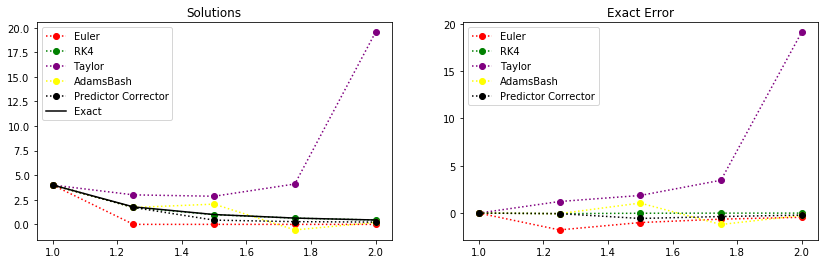

In [25]:
print('The plots below show the approximate solutions and the exact solution on the left and the exact error w-y :')
fig = plt.figure(figsize=(14,4))
plt.subplot(1, 2, 1)
plt.plot(time,Euler,'o:',color='red',label='Euler')
plt.plot(time,RK4,'o:',color='green',label='RK4')
plt.plot(time,Taylor,'o:',color='purple',label='Taylor')
plt.plot(time,AdamsBash,'o:',color='yellow',label='AdamsBash')
plt.plot(time,Adams,'o:',color='black',label='Predictor Corrector')
plt.plot(time,Exact,'k',label='Exact')
plt.title('Solutions')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.plot(time,Euler-Exact,'o:',color='red',label='Euler')
plt.plot(time,RK4-Exact,'o:',color='green',label='RK4')
plt.plot(time,Taylor-Exact,'o:',color='purple',label='Taylor')
plt.plot(time,AdamsBash-Exact,'o:',color='yellow',label='AdamsBash')
plt.plot(time,Adams-Exact,'o:',color='black',label='Predictor Corrector')
plt.title('Exact Error')
plt.legend(loc='best')
plt.show()

## Conclusion
The most accurate method is the 4th order Runge Kutta.

In [26]:
# Supplementary functions

# derivative of the exact with respect to t
def myfun_exactd(t):
    ftw=-(2*t-1)/(t*t-t+1/INITIALCONDITION)**1

    return ftw

# 4th derivative of the exact with respect to t


def myfun_exactdddd(t):
    ftw=24*(2*t-1)**4/(t*t-t+1/INITIALCONDITION)**5-72*(2*t-1)**2/(t*t-t+1/INITIALCONDITION)**3+24/(t*t-t+1/INITIALCONDITION)**2

    return ftw


